In [71]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
'''ベイズ最適化の練習'''

'ベイズ最適化の練習'

In [72]:
from matplotlib import pyplot as plt
import optuna

In [73]:
# 謎の値
secret1 = 2
secret2 = 5
secret3 = -6

In [74]:
# 指定されたパラメータにて計算を行い結果を返す
def objective(trial):
    x = trial.suggest_float('x', -10, 10) # xはoptunaから指定される
    y = trial.suggest_float('y', -10, 10) # yはoptunaから指定される
    z = trial.suggest_float('z', -10, 10) # yはoptunaから指定される
#    result = (x - secret1) ** 2
#   result = (x - secret1) ** 2 + (y - secret2) ** 2
    result = (x - secret1) ** 2 + (y - secret2) ** 2 + (z - secret3) ** 2
    return result

In [75]:
# パラメータ探索準備
study = optuna.create_study()

[I 2025-05-20 13:57:05,619] A new study created in memory with name: no-name-e25e4d96-4299-473a-b519-e62928ce9f1b


In [76]:
# 探索実行(50回)
study.optimize(objective, n_trials=100)

[I 2025-05-20 13:57:05,631] Trial 0 finished with value: 222.22339431405356 and parameters: {'x': 1.0816084780508, 'y': 6.308145548858452, 'z': 8.8212248667061}. Best is trial 0 with value: 222.22339431405356.
[I 2025-05-20 13:57:05,632] Trial 1 finished with value: 96.48106583010255 and parameters: {'x': -6.692436592290527, 'y': 0.6786290412208178, 'z': -4.500545113805991}. Best is trial 1 with value: 96.48106583010255.
[I 2025-05-20 13:57:05,634] Trial 2 finished with value: 302.55726054015815 and parameters: {'x': -4.2661445314295054, 'y': -7.292182517797339, 'z': 4.59221139330932}. Best is trial 1 with value: 96.48106583010255.
[I 2025-05-20 13:57:05,635] Trial 3 finished with value: 75.5587353201432 and parameters: {'x': -3.962573010797559, 'y': 5.376780668615513, 'z': 0.3138336008172864}. Best is trial 3 with value: 75.5587353201432.
[I 2025-05-20 13:57:05,637] Trial 4 finished with value: 271.52605662281763 and parameters: {'x': -3.6693411310633746, 'y': -9.882576528678166, 'z':

In [77]:
# ベストスコア表示
print(f'best_params: {study.best_params}')
print(f'best_value: {study.best_value}')

best_params: {'x': 2.335905826274966, 'y': 4.896358931023151, 'z': -6.073229179086022}
best_value: 0.12893670797374432


In [78]:
# トライアル番号の一覧
numbers = [trial.number for trial in study.trials]
print(f'numbers: {numbers}')

numbers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [79]:
# value(誤差)の一覧
values = [trial.value for trial in study.trials]
print(f'values: {values}')

values: [222.22339431405356, 96.48106583010255, 302.55726054015815, 75.5587353201432, 271.52605662281763, 246.88835573862448, 140.32327683446317, 56.31701644734822, 212.3950726469361, 253.5960372272427, 172.63552994766525, 5.033141965784067, 4.464644854061241, 39.17075393711076, 47.30694753272521, 66.50555362841307, 23.395749424811118, 85.71939242845296, 17.65983485082257, 14.581638499185097, 34.36869378869578, 14.167545461167387, 7.6747625357426505, 9.681621391409891, 28.00141699452582, 10.525952667316812, 19.041253061956933, 71.15540515655101, 57.283337457225464, 160.72550988192077, 8.075431612219463, 8.946030679437165, 5.680596973083569, 11.977127129557584, 17.944599673693503, 19.06841411223936, 18.87319942920653, 4.988551814499119, 69.60218452641723, 82.51955392380437, 283.2380126387866, 1.6333230750902747, 4.028693028898541, 16.267418028156747, 11.125266485950316, 19.706533694028167, 192.41340237071876, 60.02637542447414, 27.493456971616773, 6.01479020011364, 1.6452315652403702, 4

In [80]:
# xの一覧
x_s = [trial.params['x'] for trial in study.trials]
print(f'x_s: {x_s}')
y_s = [trial.params['y'] for trial in study.trials]
z_s = [trial.params['z'] for trial in study.trials]

x_s: [1.0816084780508, -6.692436592290527, -4.2661445314295054, -3.962573010797559, -3.6693411310633746, 7.491033476043462, -5.0259528967221385, -5.429385601172196, -0.45297334045163495, 5.5662619891269856, -9.773897038382774, -0.2198907053469794, 1.9024567118502818, 2.615158225617959, 4.009765315514394, 9.878511966691395, -0.35824604516182124, -2.050401458392212, 3.53993392381303, 1.004424774354339, 5.908204273388857, 1.5211022252520818, 2.094020251454481, -1.016344602342008, -2.1702774788860806, 2.506937539758473, 4.813591587910922, 7.678621436165358, -2.6792992356133682, 1.3844319050818734, 0.6121244392859946, 1.3495752496727738, 0.6898962767968138, 2.9923612078074986, -1.202442030087805, 0.15213921609167524, 4.322895791330125, 2.6660817744413614, -3.3585956071606073, -6.993337464125626, 7.217131194276996, 2.5024091608855294, 0.5464871079810669, 3.3482858849558053, 5.281075221977423, -1.0545757747449236, 2.076638546139848, 0.17643457414166175, 6.28928721971727, 3.461708580096116, 2.

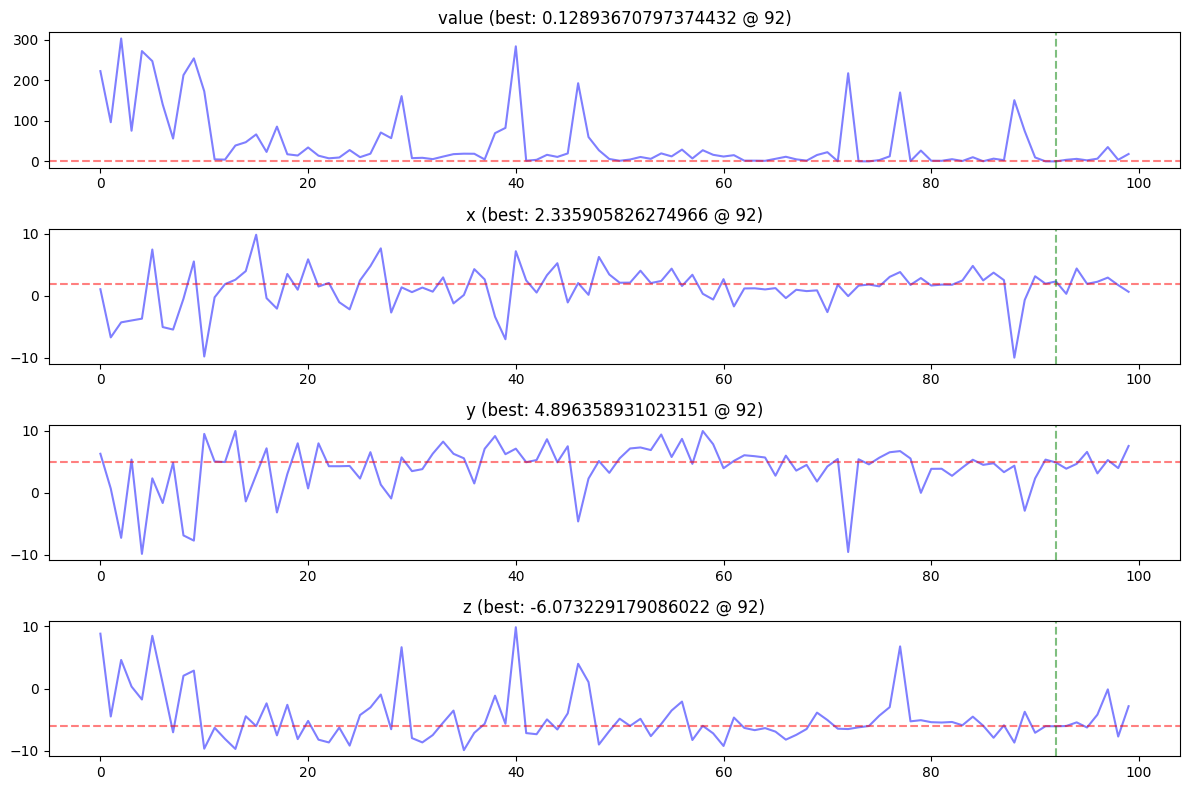

In [81]:
# 誤差のグラフ
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(411)
ax1.plot(numbers, values, color='b', alpha=0.5)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax1.axvline(x=study.best_trial.number, color='g', linestyle='--', alpha=0.5)
ax1.set_title(f'value (best: {study.best_value} @ {study.best_trial.number})')
# 求めたパラメータxのグラフ
ax2 = fig.add_subplot(412)
ax2.plot(numbers, x_s, color='b', alpha=0.5)
ax2.axhline(y=secret1, color='r', linestyle='--', alpha=0.5)
ax2.axvline(x=study.best_trial.number, color='g', linestyle='--', alpha=0.5)
ax2.set_title(f'x (best: {study.best_trial.params["x"]} @ {study.best_trial.number})')

# 求めたパラメータyのグラフ
ax3 = fig.add_subplot(413)
ax3.plot(numbers, y_s, color='b', alpha=0.5)
ax3.axhline(y=secret2, color='r', linestyle='--', alpha=0.5)
ax3.axvline(x=study.best_trial.number, color='g', linestyle='--', alpha=0.5)
ax3.set_title(f'y (best: {study.best_trial.params["y"]} @ {study.best_trial.number})')

# 求めたパラメータzのグラフ
ax3 = fig.add_subplot(414)
ax3.plot(numbers, z_s, color='b', alpha=0.5)
ax3.axhline(y=secret3, color='r', linestyle='--', alpha=0.5)
ax3.axvline(x=study.best_trial.number, color='g', linestyle='--', alpha=0.5)
ax3.set_title(f'z (best: {study.best_trial.params["z"]} @ {study.best_trial.number})')

fig.tight_layout()

In [82]:
# グラフをファイルに保存
fig.subplots_adjust(hspace=0.5)
fig.savefig('plot.png')
fig.show()

C:\Users\T123011\AppData\Local\Temp\ipykernel_6796\3102509781.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
